In [108]:
import warnings
warnings.filterwarnings("ignore")  # 🔇 Turn off all warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [109]:
df = pd.read_csv("survey.csv")  
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


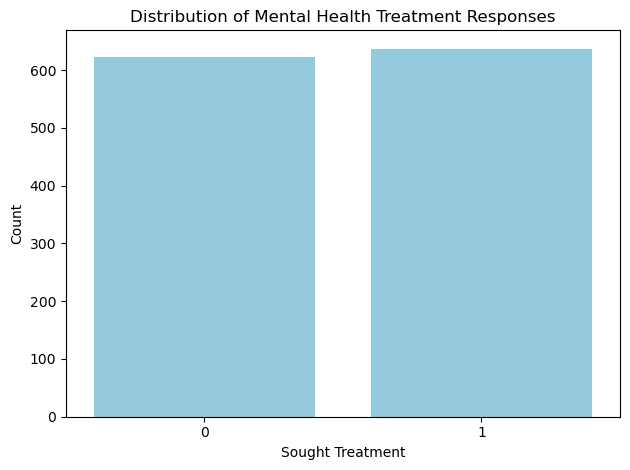

In [175]:

sns.countplot(data=df, x='treatment', color='skyblue')
plt.title('Distribution of Mental Health Treatment Responses')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


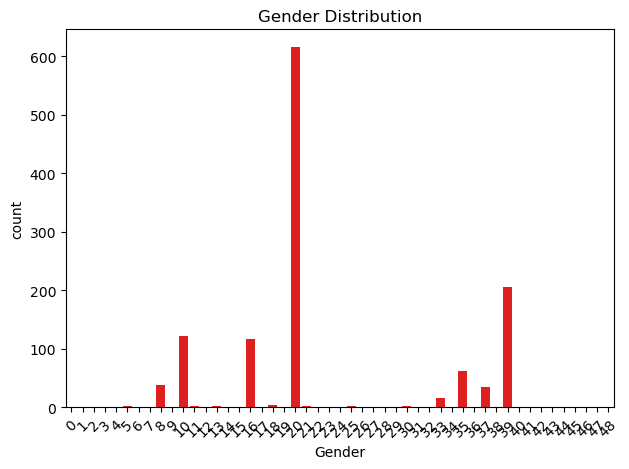

In [179]:
sns.countplot(data=df, x='Gender', color='red')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


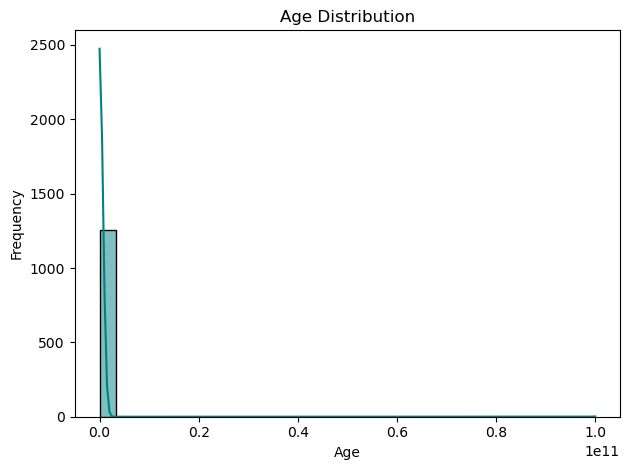

In [181]:
sns.histplot(data=df, x='Age', bins=30, kde=True, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [187]:

df = df.dropna(thresh=len(df) * 0.5, axis=1)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna('Unknown', inplace=True)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)


In [111]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [112]:
X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [113]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [114]:
y_pred_rf = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       124
           1       0.79      0.81      0.80       128

    accuracy                           0.80       252
   macro avg       0.80      0.80      0.80       252
weighted avg       0.80      0.80      0.80       252



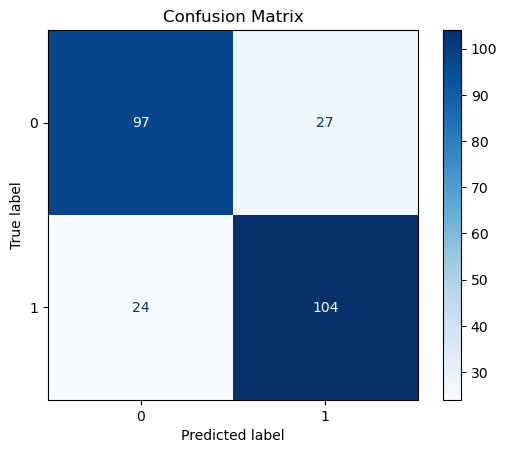

In [115]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



Top 10 Important Features:

work_interfere    0.283922
family_history    0.085544
Timestamp         0.080850
Age               0.062909
care_options      0.043630
state             0.043072
Gender            0.040515
no_employees      0.037268
Country           0.035956
benefits          0.029026
dtype: float64


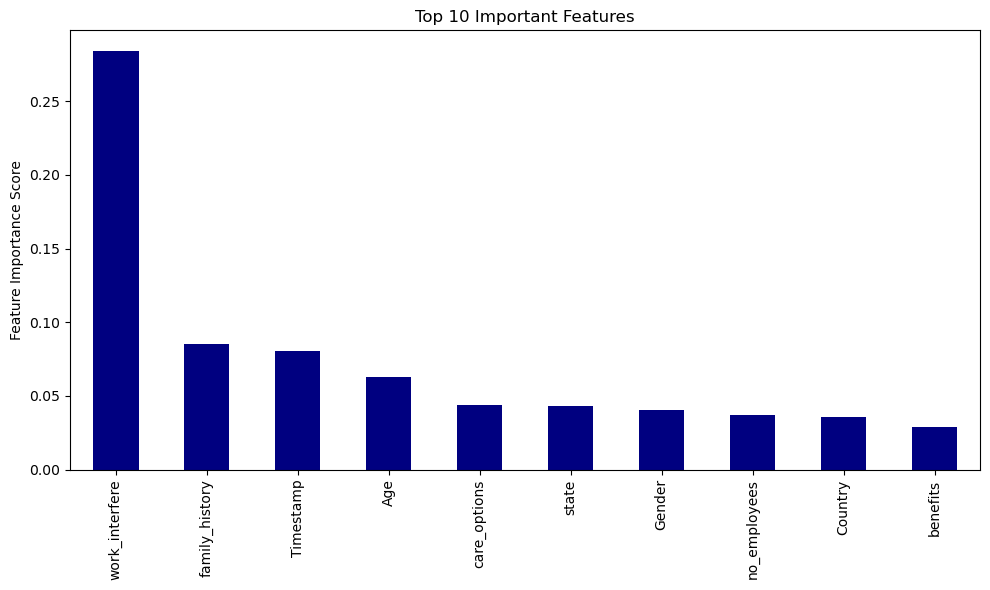

In [116]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n")
print(importances.head(10))

# Plot
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='bar', color='navy')
plt.title('Top 10 Important Features')
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()


In [117]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [118]:
y_pred_lr = lr_model.predict(X_test)


In [119]:
from sklearn.metrics import classification_report

print("\nLogistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       124
           1       0.70      0.65      0.67       128

    accuracy                           0.68       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.68      0.68      0.68       252



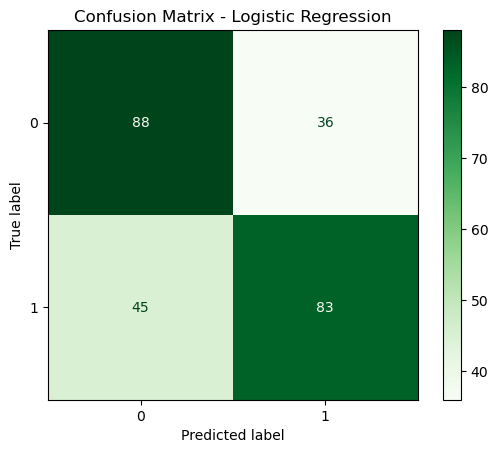

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr)
disp_lr.plot(cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [121]:
from xgboost import XGBClassifier
!pip install xgboost


In [122]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [123]:
y_pred_xgb = xgb_model.predict(X_test)


In [124]:
print("\nXGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))



XGBoost Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       124
           1       0.80      0.82      0.81       128

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252



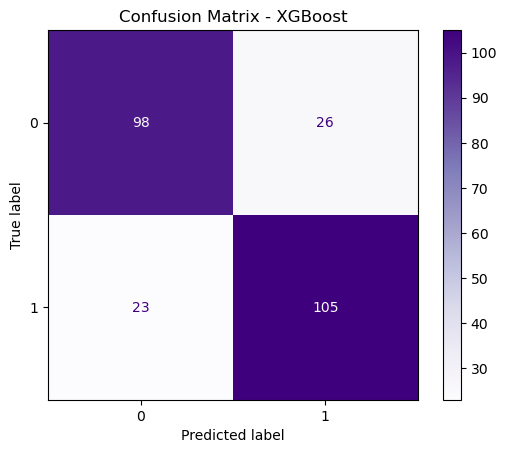

In [125]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb)
disp_xgb.plot(cmap="Purples")
plt.title("Confusion Matrix - XGBoost")
plt.show()



Top 10 Important Features for XGBoost:

work_interfere      0.287314
family_history      0.067611
tech_company        0.044632
benefits            0.041191
obs_consequence     0.039545
anonymity           0.036509
Gender              0.032555
coworkers           0.031360
wellness_program    0.030320
Country             0.030303
dtype: float32


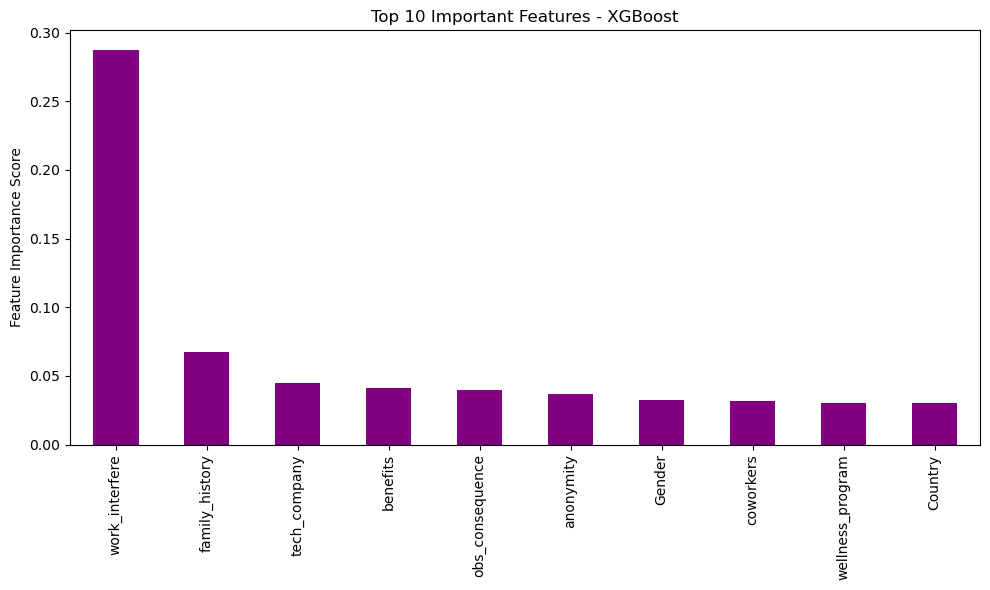

In [126]:
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features for XGBoost:\n")
print(importances_xgb.head(10))

plt.figure(figsize=(10,6))
importances_xgb.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Important Features - XGBoost')
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()


In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [128]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}


In [129]:
metrics["Model"].append("Random Forest")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
metrics["Precision"].append(precision_score(y_test, y_pred_rf))
metrics["Recall"].append(recall_score(y_test, y_pred_rf))
metrics["F1-Score"].append(f1_score(y_test, y_pred_rf))


In [130]:
metrics["Model"].append("Logistic Regression")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_lr))
metrics["Precision"].append(precision_score(y_test, y_pred_lr))
metrics["Recall"].append(recall_score(y_test, y_pred_lr))
metrics["F1-Score"].append(f1_score(y_test, y_pred_lr))


In [131]:
metrics["Model"].append("XGBoost")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_xgb))
metrics["Precision"].append(precision_score(y_test, y_pred_xgb))
metrics["Recall"].append(recall_score(y_test, y_pred_xgb))
metrics["F1-Score"].append(f1_score(y_test, y_pred_xgb))


In [132]:
comparison_df = pd.DataFrame(metrics)
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.797619   0.793893  0.812500  0.803089
1  Logistic Regression  0.678571   0.697479  0.648438  0.672065
2              XGBoost  0.805556   0.801527  0.820312  0.810811


In [133]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [134]:
y_prob_rf = model.predict_proba(X_test)[:,1]



In [135]:
y_prob_lr = lr_model.predict_proba(X_test)[:,1]


In [136]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]


In [137]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)


In [138]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)


In [139]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)


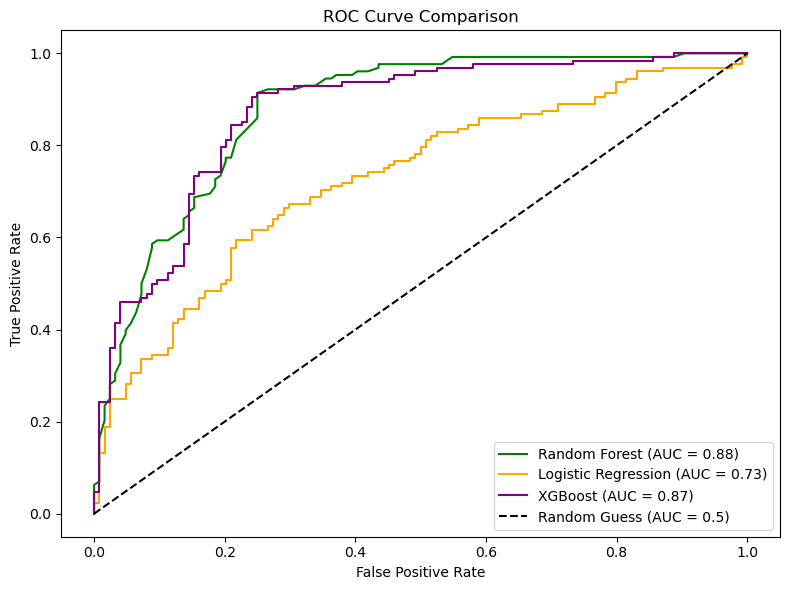

In [140]:
plt.figure(figsize=(8,6))

plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='orange', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
